In [2]:
import pandas as pd
import h5py


In [3]:
filename = "/Users/wanne/hdf5/raw/20231024-124523.hdf5"

with h5py.File(filename, 'r') as f:
    eeg_bands = f['eeg/raw/table'][:]

    

In [4]:
# inspecting structure/hierarchy 
with h5py.File(filename, 'r') as f:
    def print_structure(name, obj):
        print(name)
    f.visititems(print_structure)


eeg
eeg/raw
eeg/raw/_i_table
eeg/raw/_i_table/index
eeg/raw/_i_table/index/abounds
eeg/raw/_i_table/index/bounds
eeg/raw/_i_table/index/indices
eeg/raw/_i_table/index/indicesLR
eeg/raw/_i_table/index/mbounds
eeg/raw/_i_table/index/mranges
eeg/raw/_i_table/index/ranges
eeg/raw/_i_table/index/sorted
eeg/raw/_i_table/index/sortedLR
eeg/raw/_i_table/index/zbounds
eeg/raw/table


In [5]:
# check data type
print(type(eeg_bands))
print(eeg_bands.dtype)


<class 'numpy.ndarray'>
[('index', '<i8'), ('values_block_0', '<f8', (130,))]


In [6]:
# converting structured numpy array into pandas DataFrame 
# Extracting the index and values fields
index_data = eeg_bands['index']
values_data = eeg_bands['values_block_0']

# Constructing the DataFrame
df = pd.DataFrame(values_data, index=index_data)

# Renaming the columns for clarity
column_names = [f"Channel_{i+1}" for i in range(values_data.shape[1])]
df.columns = column_names

# Display the first few rows
print(df.head())


                     Channel_1  Channel_2  Channel_3  Channel_4  Channel_5  \
1698151524103461376   0.000000  -3.222656   9.082031   9.472656  25.781250   
1698151524104384768   3.710938  -1.953125   9.277344   8.691406  29.589844   
1698151524105329152   8.203125   1.367188  15.136719  15.722656  35.351562   
1698151524106323712   9.375000   5.957031  22.265625  20.507812  35.156250   
1698151524107281408   8.789062   6.347656  22.558594  20.019531  31.542969   

                     Channel_6  Channel_7  Channel_8  Channel_9  Channel_10  \
1698151524103461376   0.878906 -39.843750   0.781250  11.914062   12.597656   
1698151524104384768  12.890625 -40.722656   2.246094  16.406250   13.867188   
1698151524105329152  30.566406 -34.472656   8.691406  21.679688   20.019531   
1698151524106323712  61.035156 -28.515625  13.671875  24.707031   26.074219   
1698151524107281408  57.910156 -26.367188  12.890625  23.730469   24.511719   

                     ...  Channel_121  Channel_122  Chan

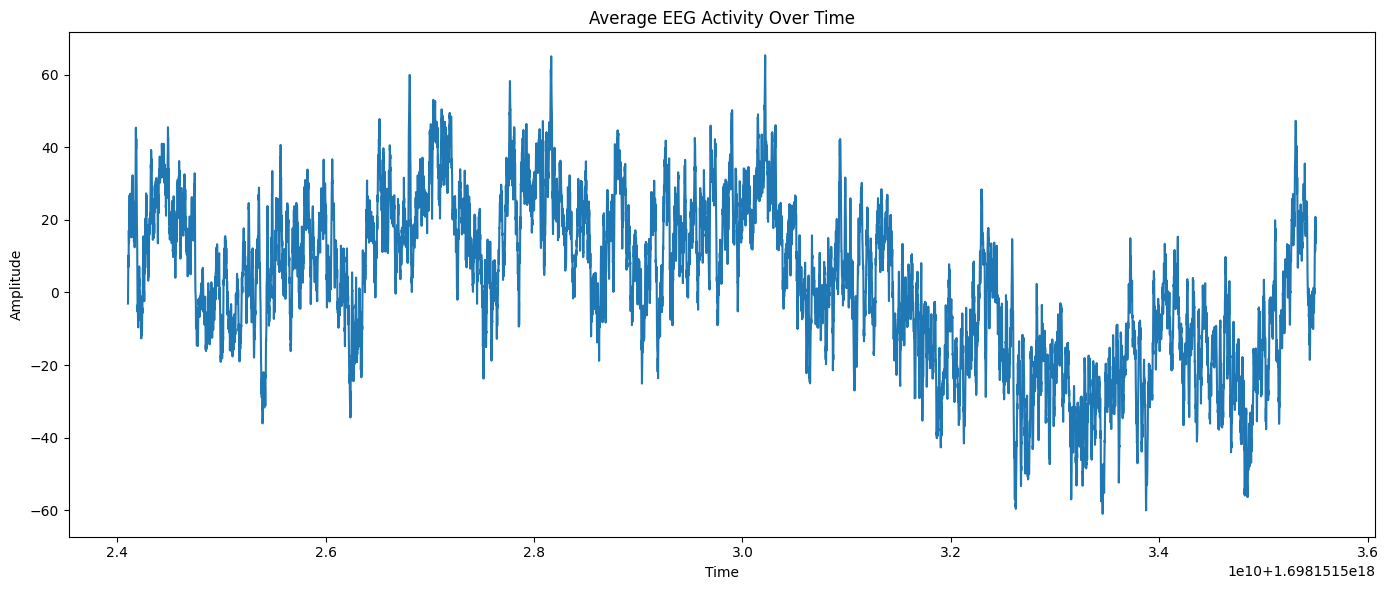

In [11]:
import matplotlib.pyplot as plt

# Compute the average across all channels
df['average'] = df.mean(axis=1)

# Plot the average
plt.figure(figsize=(14, 6))
df['average'].plot()

plt.title('Average EEG Activity Over Time')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()
